# Etapa 1: Ambiente

In [3]:
!pip install pandas matplotlib

# Etapa 2: Desenvolvimento

### 1. Importação das bibliotecas e leitura do arquivo csv sem linhas duplicadas

In [670]:
# Importa as bibliotecas Pandas e Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Bibliotecas adicionais
import matplotlib.ticker as ticker

# Lê o arquivo .csv
conteudo = pd.read_csv('googleplaystore.csv')

# Remove as linhas duplicadas
conteudo = conteudo.drop_duplicates()

### 2. Gráfico de Barras: Top 5 aplicativos por número de instalação

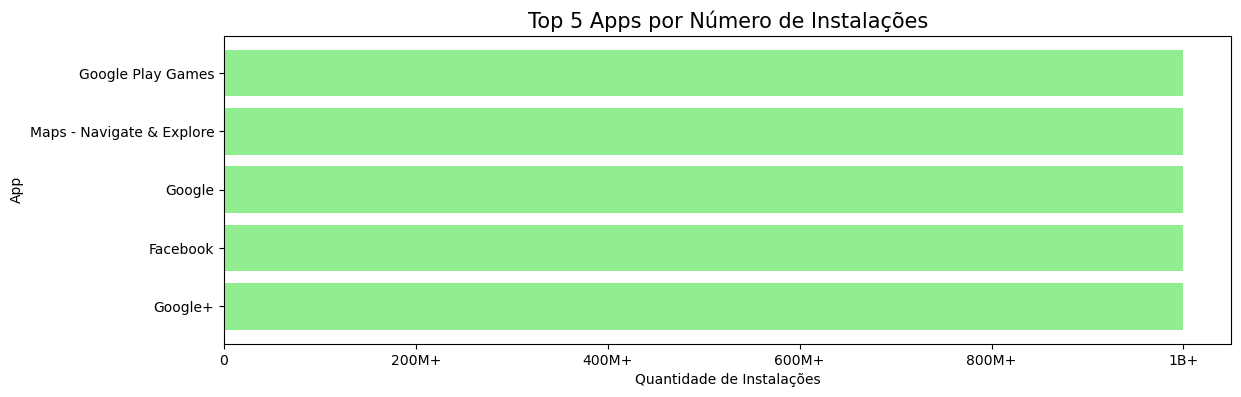

In [690]:
# Lê o arquivo .csv e remove as linhas duplicadas
conteudo = pd.read_csv('googleplaystore.csv')
conteudo = conteudo.drop_duplicates()

# Função para tratar os dados de numeros de instalações
def trata_installs(num):
    num = num.replace('+', '')
    if 'M' in num:
        return float(num.replace('M', '').replace(',', '')) * 1000000
    elif 'K' in num:
        return float(num.replace('K', '').replace(',', '')) * 1000
    else:
        try:
            return float(num.replace(',', ''))
        except ValueError:
            return 0 

# Converte a coluna 'Installs' de string para float
installs_num = []
for num in conteudo['Installs']:
    installs_num.append(trata_installs(num))
conteudo['Installs'] = installs_num

# Seleciona os apps que possuem maior numero de instalações
top_apps = conteudo[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(5)

# CONFERINDO OS APLICATIVOS COM MAIOR NUMERO DE INSTALAÇÕES
# conteudo_sorted = conteudo[['App', 'Installs']].sort_values(by='Installs', ascending=False)
# print(conteudo_sorted.head(10))

# Criação do gráfico de barras
plt.figure(figsize=(13, 4))
plt.barh(top_apps['App'], top_apps['Installs'], color='#90EE90')
plt.xlabel('Quantidade de Instalações')
plt.ylabel('App')
plt.title('Top 5 Apps por Número de Instalações', fontsize=15)

# Formatando o eixo x 
def format_x(num, t_number):
    if num >= 1000000000:
        return f'{int(num / 1000000000)}B+'
    elif num >= 1000000:
        return f'{int(num / 1000000)}M+'
    elif num >= 1000:
        return f'{int(num / 1000)}K+'
    else:
        return f'{int(num)}'

# Mostra o gráfico e os eixos x e y tratados
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_x))
plt.gca().invert_yaxis()
plt.show()

### 3. Gráfico de Pizza: Categorias dos aplicativos de acordo com a frequência

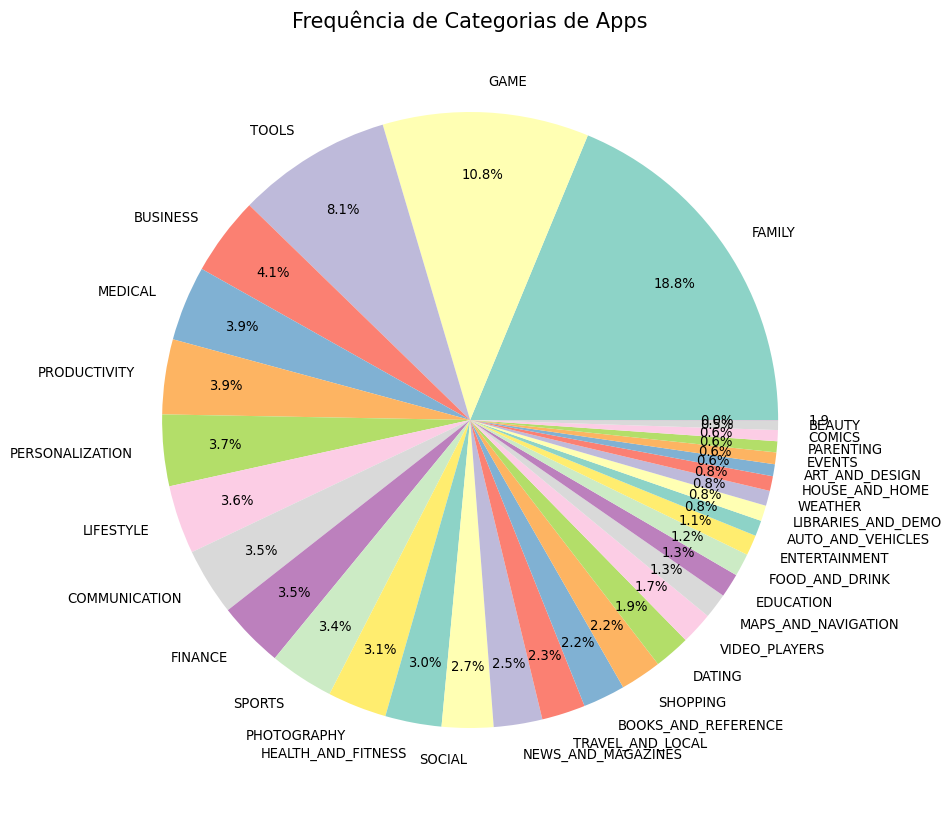

In [757]:
# Lê o arquivo .csv e remove as linhas duplicadas
conteudo = pd.read_csv('googleplaystore.csv')
conteudo = conteudo.drop_duplicates()


categoria_counts = conteudo['Category'].value_counts()

# Cria e estiliza o gráfico de pizza
plt.figure(figsize=(12, 10))
plt.pie(categoria_counts,
        labels=categoria_counts.index,
        autopct='%1.1f%%', 
        colors=plt.get_cmap('Set3').colors,
        labeldistance=1.1,  
        pctdistance=0.8,   
        textprops={'fontsize': 9.5}, 
       )

# Adiciona o título do gráfico
plt.title('Frequência de Categorias de Apps', fontsize=15)

# Exibe o gráfico de pizza
plt.show()


## 4. App mais caro da Google Play Store

O aplicativo mais caro é:
Nome: I'm Rich - Trump Edition
Preço: $400.0




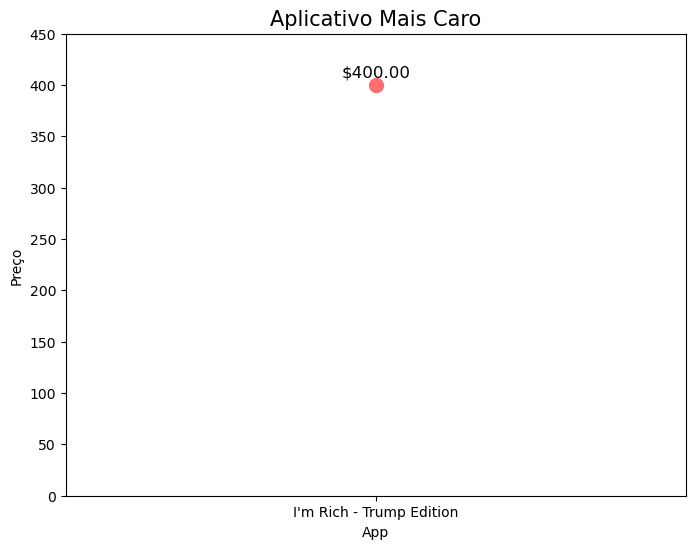

In [744]:
# Lê o arquivo .csv e remove as linhas duplicadas
conteudo = pd.read_csv('googleplaystore.csv')
conteudo = conteudo.drop_duplicates()

# Função que trata os dados de preço e os converte para float
def trata_price(price):
    try:
        return float(price.replace('$', '').replace(',', ''))
    except ValueError:
        return 0  # Retorna 0 para valores não numéricos

# Trata os dados da coluna 'Price'
conteudo['Price'] = conteudo['Price'].apply(trata_price)

# Guarda o aplicativo que possui o maior preço
app_mais_caro = conteudo.loc[conteudo['Price'].idxmax()]

# Exibe o app mais caro
print('O aplicativo mais caro é:')
print(f'Nome: {app_mais_caro['App']}')
print(f'Preço: ${app_mais_caro['Price']}\n\n')

# Criação do gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter([app_mais_caro['App']], [app_mais_caro['Price']], color='#FF6F6F', s=100)
plt.xlabel('App')
plt.ylabel('Preço')
plt.title('Aplicativo Mais Caro', fontsize=15)

# Adiciona o valor do ponto no gráfico e o configura
plt.text(app_mais_caro['App'], app_mais_caro['Price'] + 5, f'${app_mais_caro['Price']:.2f}', 
         ha='center', va='bottom', fontsize=12)

# Ajusta os limites do gráfico
plt.ylim(0, app_mais_caro['Price'] + 50) 

# Exibe o gráfico
plt.show()

### 5. Quantidade de aplicativos classificados como 'Mature 17+'

Quantidade de aplicativos classificados como 'Mature 17+': 447




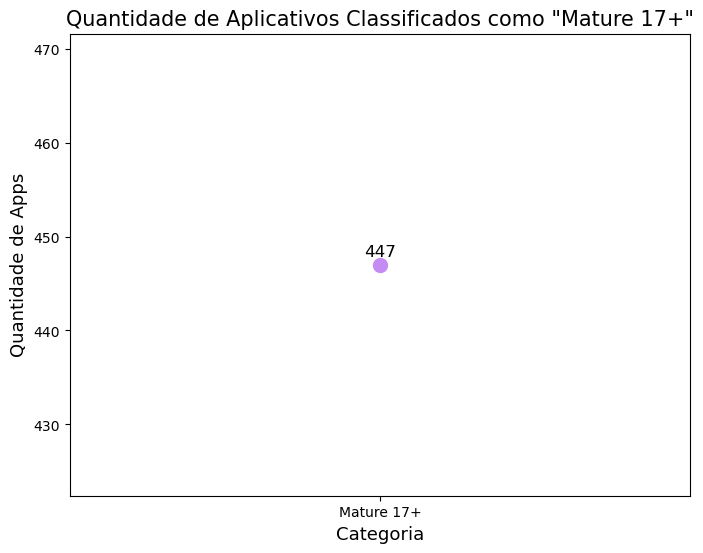

In [688]:
# Lê o arquivo .csv e remove as linhas duplicadas
conteudo = pd.read_csv('googleplaystore.csv')
conteudo = conteudo.drop_duplicates()

# Guarda a quantidade de aplicativos classificados como 'Mature 17+'
count_mature_17_plus = conteudo[conteudo['Content Rating'] == 'Mature 17+'].shape[0]

# Exibe a quantidade de aplicativos classificados como 'Mature 17+'
print(f"Quantidade de aplicativos classificados como 'Mature 17+': {count_mature_17_plus}\n\n")

# Criação do gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(['Mature 17+'], [count_mature_17_plus], color='#C58BF2', s=100)
plt.xlabel('Categoria', fontsize=13)
plt.ylabel('Quantidade de Apps', fontsize=13)
plt.title('Quantidade de Aplicativos Classificados como "Mature 17+"', fontsize=15)

# Adiciona e configura o valor do ponto no gráfico
plt.text('Mature 17+', count_mature_17_plus + 0.6, str(count_mature_17_plus), ha='center', va='bottom', fontsize=12)

# Exibe o gráfico
plt.show()

### 6. Gráfico de Barras: Top 10 aplicativos por numero de reviews

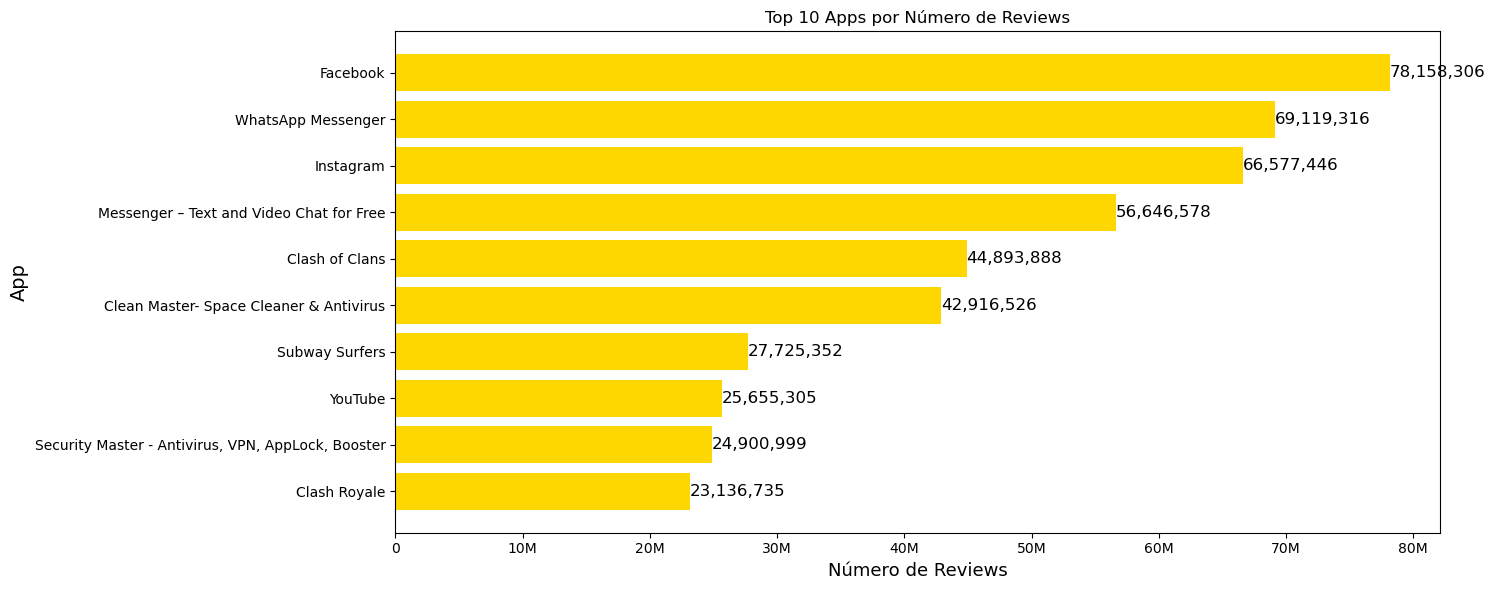

In [764]:
# Ler o arquivo CSV
conteudo = pd.read_csv('googleplaystore.csv')

# Função para converter a coluna 'Reviews' para formato numérico
def trata_reviews(value):
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove vírgulas
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
        else:
            try:
                return float(value)
            except ValueError:
                return 0
    return 0

# Trata os dados da coluna 'Reviews'
conteudo['Reviews'] = conteudo['Reviews'].apply(trata_reviews)

# Remove as linhas duplicadas mantendo a linha com o maior número de reviews para cada app
conteudo = conteudo.loc[conteudo.groupby('App')['Reviews'].idxmax()]

# Seleciona os 10 apps com mais reviews
top_10_apps = conteudo[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)

# Criação do gráfico de barras
plt.figure(figsize=(15, 6))  # Ajustar o tamanho do gráfico
bars = plt.barh(top_10_apps['App'], top_10_apps['Reviews'], color='#FFD700')
plt.xlabel('Número de Reviews', fontsize=13)
plt.ylabel('App', fontsize=14)
plt.title('Top 10 Apps por Número de Reviews')

# Adiciona os números de reviews em cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width):,}', 
             va='center', ha='left', color='black', fontsize=12)

# Formata os numeros do eixo x
ax = plt.gca()
def formata_x(value, tick_num):
    if value >= 1000000:
        return f'{int(value / 1000000):,}M'
    elif value >= 1000:
        return f'{int(value / 1000):,}K'
    else:
        return str(int(value))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(formata_x))

# Inverte o eixo y para que o app com mais reviews fique no topo
plt.gca().invert_yaxis()

# Ajusta o comprimento da borda do gráfico
plt.tight_layout() 

# Exibe o gráfico
plt.show()

### 7.1. Gráfico de Dispersão: Média de preço dos aplicativos pagos

A média do preço dos apps pagos é: $13.96




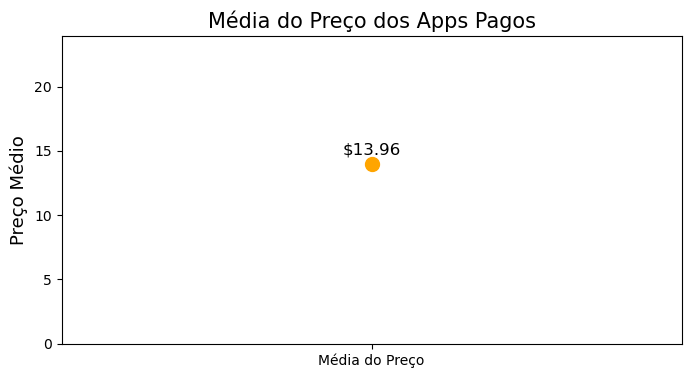

In [742]:
# MÉDIA DE PREÇO DOS APPS PAGOS

# Lê o arquivo .csv e remove as linhas duplicadas
conteudo = pd.read_csv('googleplaystore.csv')
conteudo = conteudo.drop_duplicates()

# Trata os dados da coluna 'Price'
conteudo['Price'] = conteudo['Price'].str.replace('$', '').str.strip()

# Filtra os valores que são números válidos e converte para float
conteudo = conteudo[conteudo['Price'].apply(lambda x: x.replace('.', '', 1).isdigit())]
conteudo['Price'] = conteudo['Price'].astype(float)

# Calcula e guarda a média do preço dos apps pagos
media_preco_pagos = conteudo[conteudo['Type'] == 'Paid']['Price'].mean()

# Exibe o resultado 
print(f'A média do preço dos apps pagos é: ${media_preco_pagos:.2f}\n\n')

# Criação do gráfico de dispersão
plt.figure(figsize=(8, 4))
plt.scatter(['Média do Preço'], [media_preco_pagos], color='#FFA500', s=100)
plt.ylabel('Preço Médio', fontsize=13)
plt.title('Média do Preço dos Apps Pagos', fontsize=15)

# Adiciona o valor do ponto no gráfico, com ajuste na posição do texto
plt.text('Média do Preço', media_preco_pagos + 0.5, f'${media_preco_pagos:.2f}', ha='center', va='bottom', fontsize=12)

# Ajusta os limites do gráfico
plt.ylim(0, media_preco_pagos + 10)

# Exibe o 
plt.show()

### 7.2. Gráfico de Área: Quantidade de aplicativos por avaliação

Quantidade de Apps por Rating:
Rating 1.0: 16 apps
Rating 1.2: 1 apps
Rating 1.4: 3 apps
Rating 1.5: 3 apps
Rating 1.6: 4 apps
Rating 1.7: 8 apps
Rating 1.8: 8 apps
Rating 1.9: 13 apps
Rating 2.0: 12 apps
Rating 2.1: 8 apps
Rating 2.2: 14 apps
Rating 2.3: 20 apps
Rating 2.4: 19 apps
Rating 2.5: 20 apps
Rating 2.6: 24 apps
Rating 2.7: 23 apps
Rating 2.8: 40 apps
Rating 2.9: 45 apps
Rating 3.0: 82 apps
Rating 3.1: 69 apps
Rating 3.2: 64 apps
Rating 3.3: 101 apps
Rating 3.4: 127 apps
Rating 3.5: 157 apps
Rating 3.6: 169 apps
Rating 3.7: 231 apps
Rating 3.8: 293 apps
Rating 3.9: 372 apps
Rating 4.0: 539 apps
Rating 4.1: 657 apps
Rating 4.2: 888 apps
Rating 4.3: 1016 apps
Rating 4.4: 1032 apps
Rating 4.5: 977 apps
Rating 4.6: 768 apps
Rating 4.7: 484 apps
Rating 4.8: 228 apps
Rating 4.9: 87 apps
Rating 5.0: 271 apps





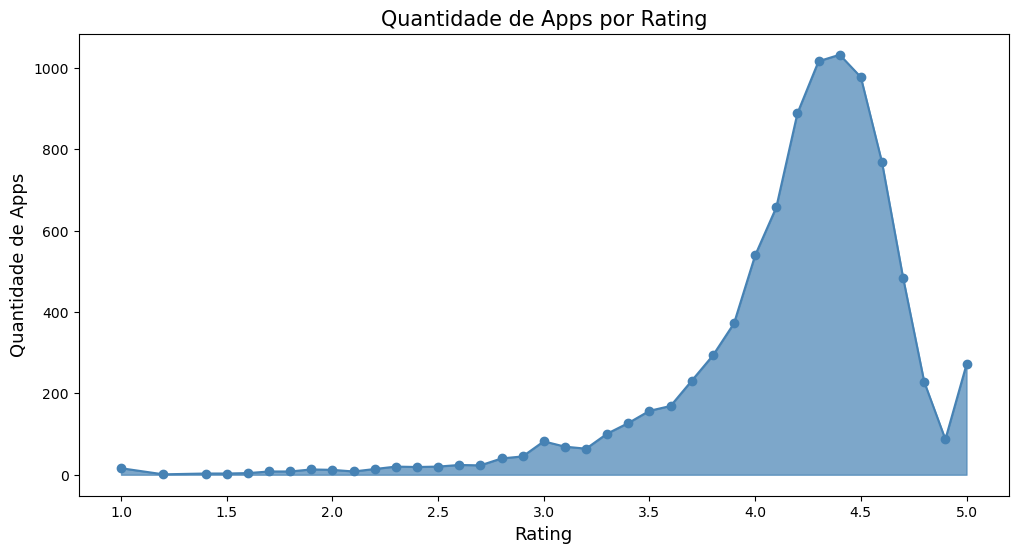

In [746]:
# Lê o arquivo .csv e remove as linhas duplicadas
conteudo = pd.read_csv('googleplaystore.csv')
conteudo = conteudo.drop_duplicates()

# Função para tratar os dados da coluna 'Rating' 
def trata_rating(value):
    try:
        rating = float(value)
        if rating >= 10:
            return rating / 10
        return rating
    except ValueError:
        return None  # Retorna None para valores inválidos

# trata os dados da coluna 'Rating' através da função
conteudo['Rating'] = conteudo['Rating'].apply(trata_rating)

# Agrupa os ratings e conta a quantidade de apps com cada rating
rating_counts = conteudo['Rating'].value_counts().sort_index()

# Exibe uma lista com a quantidade de apps para cada rating
print('Quantidade de Apps por Rating:')
for rating, count in rating_counts.items():
    print(f'Rating {rating:.1f}: {count} apps')
print('\n\n')
    
# Cria o gráfico de área
plt.figure(figsize=(12, 6))
plt.fill_between(rating_counts.index, rating_counts.values, color='#4682B4', alpha=0.7)
plt.plot(rating_counts.index, rating_counts.values, marker='o', color='#4682B4')  # Adiciona a linha sobre a área
plt.xlabel('Rating', fontsize=13)
plt.ylabel('Quantidade de Apps', fontsize=13)
plt.title('Quantidade de Apps por Rating', fontsize=15)

# Exibe o gráfico
plt.show()